In [1]:
#SHADRACK NAMBA

#PROPOSAL REQUEST FOR PROJECT ONE

#Brief summary of My interests and intent

#according to investopedia,the term unicorn refers to a privately held startup company with a value of over $1 billion.

#It is commonly used in the venture capital industry. 

#Unicorns are very rare and require innovation. Because of their sheer size, 

#unicorn investors tend to be private investors or venture capitalists, which means they are out of the reach of retail

#investors. Although it isn't necessary, many unicorns work their way to going public.
 
# My project is to uncover formation patterns,locations and distributions accross the world in unicorn industries.

#I will examine relationships between industry type and location,the number of USA unicorns and their 

#distribution by cities,based on unicorn valutions. 

#and number of unicorn in a location,i will calculate the city or region's valuations and establish trends

#in the unicorn industry and many related questions, as the my datamay permit .


# Data Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
start_ups = pd.read_csv('unicorn.csv')

In [4]:
start_ups.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [5]:
start_ups.columns

Index(['Company', 'Valuation', 'Date', 'Country', 'City', 'Industry',
       'Investors', 'year', 'month', 'day'],
      dtype='object')

In [6]:
start_ups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    936 non-null    object 
 1   Valuation  936 non-null    float64
 2   Date       936 non-null    object 
 3   Country    936 non-null    object 
 4   City       921 non-null    object 
 5   Industry   936 non-null    object 
 6   Investors  936 non-null    object 
 7   year       936 non-null    int64  
 8   month      936 non-null    int64  
 9   day        936 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 73.2+ KB


# Data Inspecting and Cleaning

In [7]:
start_ups.isnull().sum()

Company       0
Valuation     0
Date          0
Country       0
City         15
Industry      0
Investors     0
year          0
month         0
day           0
dtype: int64

In [8]:
start_ups.duplicated().sum()

0

In [9]:
start_ups.dropna(inplace=True)
start_ups.isnull().sum()

Company      0
Valuation    0
Date         0
Country      0
City         0
Industry     0
Investors    0
year         0
month        0
day          0
dtype: int64

In [10]:
start_ups.shape

(921, 10)

# Exploratory Data Analysis

In [11]:
start_ups.describe()

,Valuation,year,month,day
count,921.000000,921.000000,921.000000,921.000000
mean,3.287904,2019.527687,15.704669,6.735071
std,7.495255,2.027942,8.646290,3.264659
min,1.000000,2007.000000,1.000000,1.000000
25%,1.080000,2018.000000,8.000000,4.000000
50%,1.600000,2021.000000,16.000000,7.000000
75%,3.000000,2021.000000,23.000000,10.000000
max,140.000000,2021.000000,31.000000,12.000000


In [12]:
start_ups.describe().T #Transposing

,count,mean,std,min,25%,50%,75%,max
Valuation,921.0,3.287904,7.495255,1.0,1.08,1.6,3.0,140.0
year,921.0,2019.527687,2.027942,2007.0,2018.00,2021.0,2021.0,2021.0
month,921.0,15.704669,8.646290,1.0,8.00,16.0,23.0,31.0
day,921.0,6.735071,3.264659,1.0,4.00,7.0,10.0,12.0


In [13]:
#to undesrtand the startup industries involved
start_ups['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [14]:
#to correct the spelling in the finttech and artificial intelligence industries

start_ups.Industry.replace('Finttech', 'Fintech', inplace=True)

start_ups.Industry.replace('Artificial intelligence', 'Artificial Intelligence', inplace=True)

In [15]:
#to confirm corrections
start_ups['Industry'].unique()

array(['Artificial Intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Cybersecurity',
       'Mobile & telecommunications', 'Travel'], dtype=object)

# finding startups formation on year.

In [16]:
#Recalling the data

start_ups.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


In [17]:
#to establish industries involved
start_ups['Industry'].value_counts()

Fintech                                185
Internet software & services           166
E-commerce & direct-to-consumer         98
Artificial Intelligence                 71
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     50
Cybersecurity                           41
Data management & analytics             36
Mobile & telecommunications             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: Industry, dtype: int64

Text(0.5, 1.0, 'startups distibution by Industry')

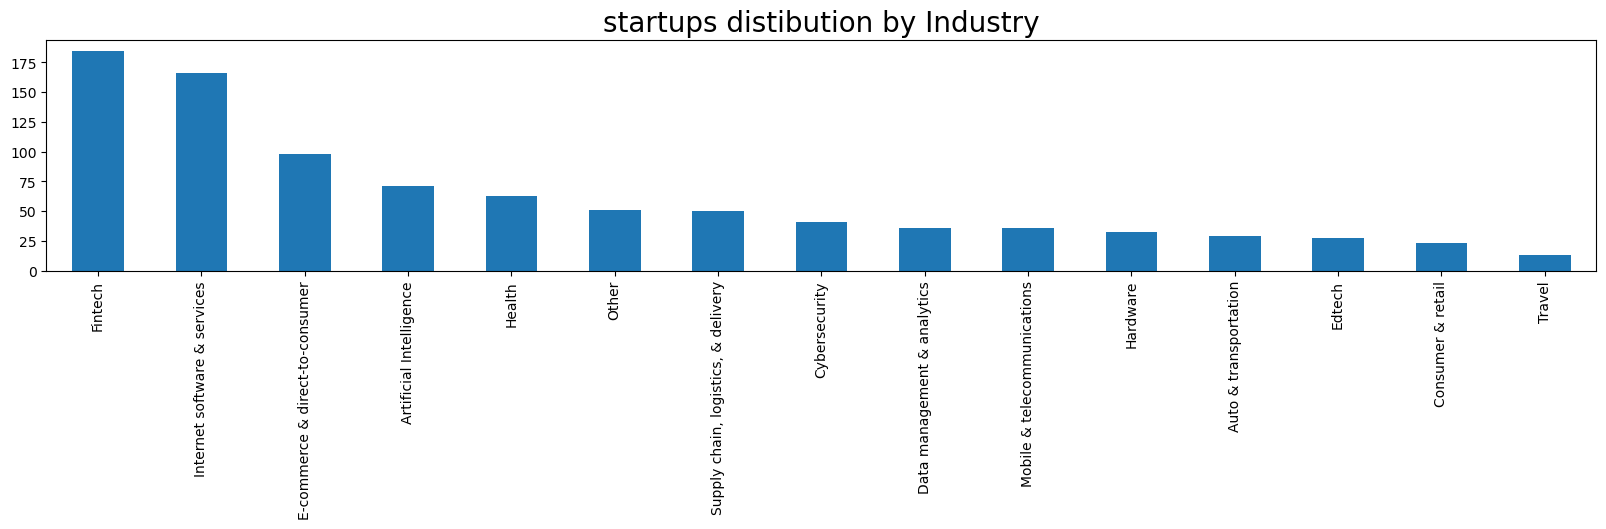

In [18]:
#to visualise the industries involved
start_ups['Industry'].value_counts().plot(kind="bar",figsize=(20,3))
plt.title("startups distibution by Industry", fontdict={"fontsize":20})

In [21]:
#to find out how the unicorn numbers have been increasing

start_ups['year'].value_counts()

2021    468
2019    109
2020    109
2018    107
2017     45
2015     37
2016     22
2014     13
2012      4
2013      3
2011      2
2010      1
2007      1
Name: year, dtype: int64

Text(0, 0.5, 'No pf startup')

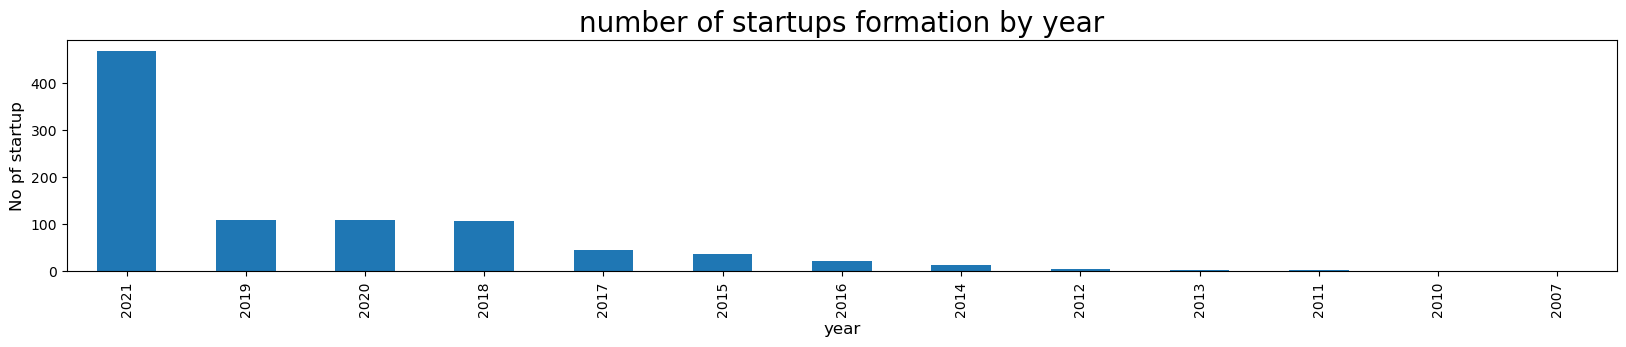

In [39]:
#plot the results

start_ups['year'].value_counts().plot(kind="bar",figsize=(20,3))
plt.title("number of startups formation by year", fontdict={"fontsize":20})
plt.xlabel("year",fontdict={"fontsize":12})
plt.ylabel("No pf startup",fontdict={"fontsize":12})

In [23]:
#establisg startups by countries 

start_ups.Country.value_counts().head(15)

United States     477
China             169
India              51
United Kingdom     37
Germany            23
Israel             21
France             19
Canada             15
Brazil             15
South Korea        11
Australia           6
Japan               6
Mexico              5
Netherlands         5
Spain               4
Name: Country, dtype: int64

Text(0, 0.5, 'No pf startup')

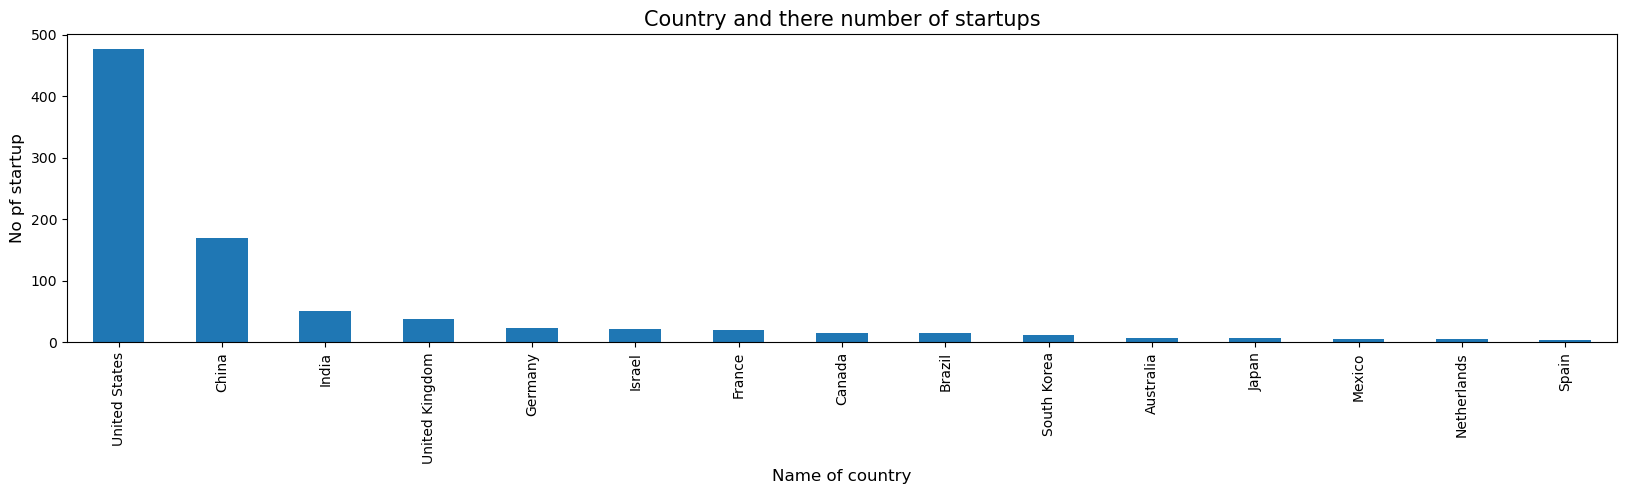

In [40]:
#ploting the results
start_ups.Country.value_counts().head(15).plot(kind="bar",figsize=(20,4))
plt.title("Country and there number of startups",fontdict={"fontsize":15})
plt.xlabel("Name of country",fontdict={"fontsize":12})
plt.ylabel("No pf startup",fontdict={"fontsize":12})

In [44]:
#taking the top two

start_ups.Country.value_counts().head(2)

United States    477
China            169
Name: Country, dtype: int64

In [45]:
#to find out the number of startups per year.

incept_year = start_ups.groupby('year')['Company'].count().reset_index()


In [29]:
incept_year.head(20)

,year,Company
0,2007,1
1,2010,1
2,2011,2
3,2012,4
4,2013,3
5,2014,13
6,2015,37
7,2016,22
8,2017,45
9,2018,107


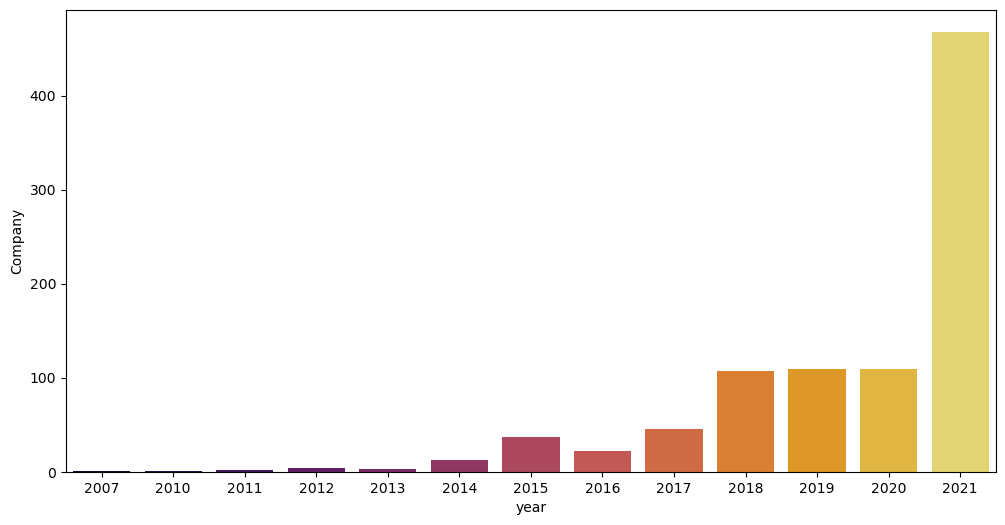

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(data=incept_year, x='year', y='Company', palette='inferno')
plt.show()

#There's an explosion in the number of new unicorns start-up in the recent year.
#Out of the 936 unicorns in the dataset, 480 entered the list last year.

In [50]:
#to culumlate the numbers in progression

incept_year_total = incept_year['Company'].cumsum()

print(incept_year_total.head)

<bound method NDFrame.head of 0       1
1       2
2       4
3       8
4      11
5      24
6      61
7      83
8     128
9     235
10    344
11    453
12    921
Name: Company, dtype: int64>


In [64]:
#to sort startups based on their Valuation

start_ups_val=start_ups.sort_values('Valuation',ascending=False).head(10) # Most valued company
start_ups_val.head(10)

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [37]:
country_value = start_ups.groupby('Country')['Valuation'].sum().reset_index()

country_value.sort_values(by='Valuation', ascending=False, inplace=True)



In [61]:
# to find out the country has the highest startup gy vavaluation

country_value=start_ups.groupby('Country',as_index=False).Valuation.count()
country_value=country_value.sort_values(by='Valuation',ascending=False)
country_value.head(5)

,Country,Valuation
43,United States,477
8,China,169
18,India,51
42,United Kingdom,37
16,Germany,23


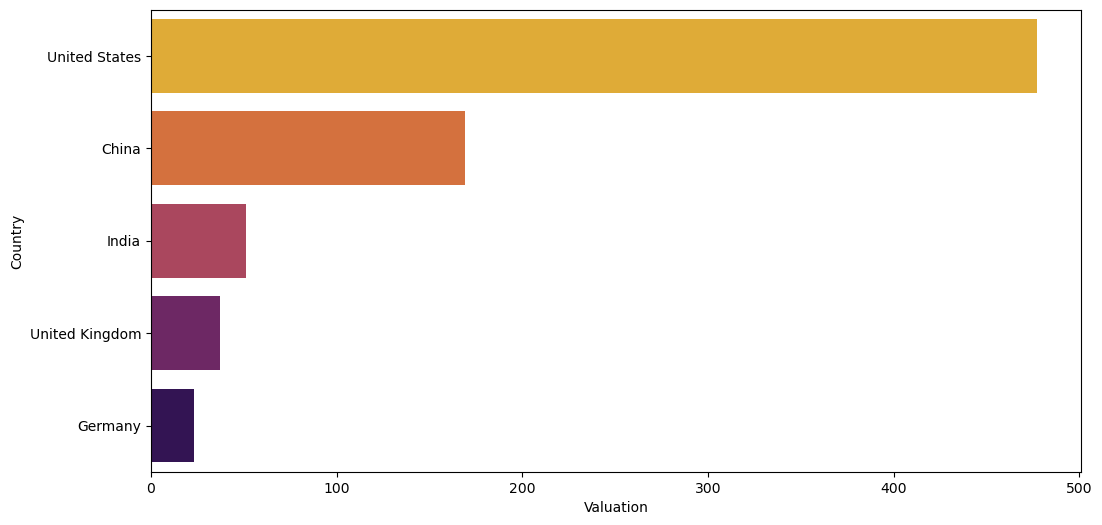

In [65]:
#ploting the rsults

plt.figure(figsize=(12,6))
sns.barplot(data=country_value.iloc[:5], y='Country', x='Valuation', palette='inferno_r')
plt.show()

In [60]:
#finding cumulative valuation based on industry

top_val_industry=start_ups.groupby('Industry')['Valuation'].median().reset_index()

top_val_industry.sort_values(by='Valuation',ascending=False, inplace=True)

top_val_industry

,Industry,Valuation
1,Auto & transportation,2.410
7,Fintech,1.900
3,Cybersecurity,1.800
10,Internet software & services,1.675
5,E-commerce & direct-to-consumer,1.650
4,Data management & analytics,1.610
2,Consumer & retail,1.590
8,Hardware,1.575
12,Other,1.550
0,Artificial Intelligence,1.500


Text(0, 0.5, 'valuations')

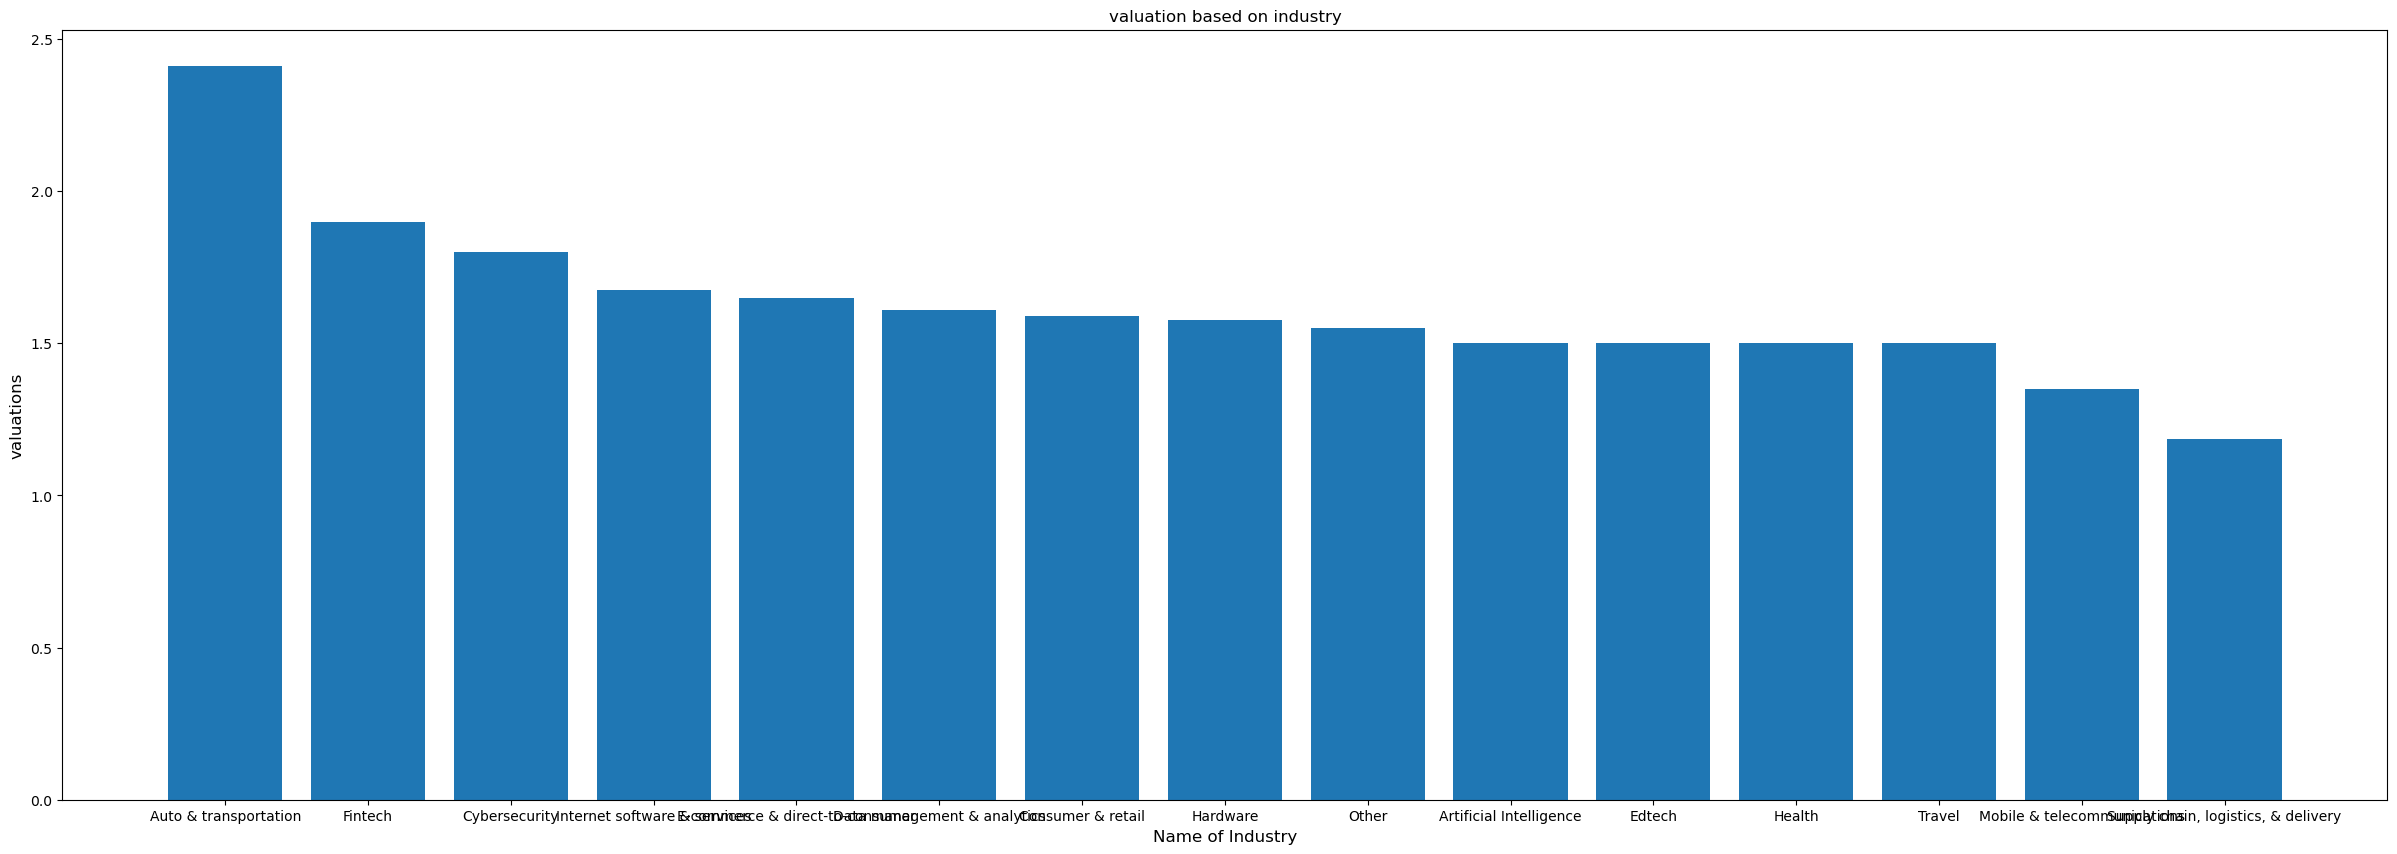

In [67]:
plt.figure(figsize=(30,10))
plt.title('valuation based on industry')
plt.bar(top_val_industry['Industry'],top_val_industry['Valuation'])
plt.xlabel("Name of Industry",fontdict={"fontsize":12})
plt.ylabel("valuations",fontdict={"fontsize":12})

In [68]:
#taking USA start ups 
usa_startup=start_ups[start_ups['Country']=='United States']
usa_startup

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10
...,...,...,...,...,...,...,...,...,...,...
929,Lessen,1.0,11/30/2021,United States,Scottsdale,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,30,11
931,YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,12
932,Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
933,Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12


In [69]:
#ranking startups in the wolrd based on the city

start_ups_city=start_ups.groupby("City", as_index=False).Valuation.count()
print("Based on valuation Which city has most valuation startups in world")
start_ups_city.sort_values(by="Valuation",ascending=False).head(10)

Based on valuation Which city has most valuation startups in world


,City,Valuation
183,San Francisco,134
150,New York,81
13,Beijing,62
198,Shanghai,45
121,London,28
17,Bengaluru,25
199,Shenzhen,18
20,Berlin,16
159,Paris,15
49,Chicago,14


In [70]:
#finding the 

sf_startups = start_ups[start_ups['City']=="San Francisco"]
sf_startups.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
10,Chime,25.0,3/5/2019,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,3
21,Plaid Technologies,13.4,12/11/2018,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,11,12
22,Grammarly,13.0,10/10/2019,United States,San Francisco,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2019,10,10
24,Faire,12.4,10/30/2019,United States,San Francisco,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2019,30,10
25,Brex,12.3,10/5/2018,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,5,10
27,JUUL Labs,12.0,12/20/2017,United States,San Francisco,Consumer & retail,"0 Sequoia Capital China, SIG Asia Investm...",2017,20,12
36,Ripple,10.0,12/20/2019,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,20,12


In [ ]:
#Most of the Unicorns are located in the United States. 

#The unicorn with the largest valuation is ByteDance, the creator of TikTok.

#However the countries with the largest unicorn median valuation are located in North-Eastern Europe.

#The AI industry is still in the bottom half in term of mean capitalization,more is to come from this industry

#Mostly startup belong to Fintech Industry i.e 20.1%

#The countries with the most Unicorns StartUps are:

        #1.The United States
       # 2.China
        #3.India


# USA most of start ups are for-'Internet software & services',china-'E-commerce &direct-to-consumers

#and india most of the startup belong to Fintech i.e more than 23&

#2021 was an explosive year for  unicorn formation i.e 468

#San Francisco has most valuation startups in world i.e $602.12B

#The top 3 industry by median valuation is:

        #1.Auto & Transportation [2.410]
        #2.Fintech [1900]
        #3.Cybersecurity [1800]


# the end